In [1]:
df<-read.csv('d:/data/creditcard/creditcard.csv')
head(df)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [2]:
library(dplyr)
df<-df %>% select(-Time) #V21,V27 제거
dim(df)
head(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 284807     30

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,0.09079417,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,-0.16697441,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,0.20764287,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,-0.05495192,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,0.75307443,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,-0.37140720,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0



     0      1 
284315    492 

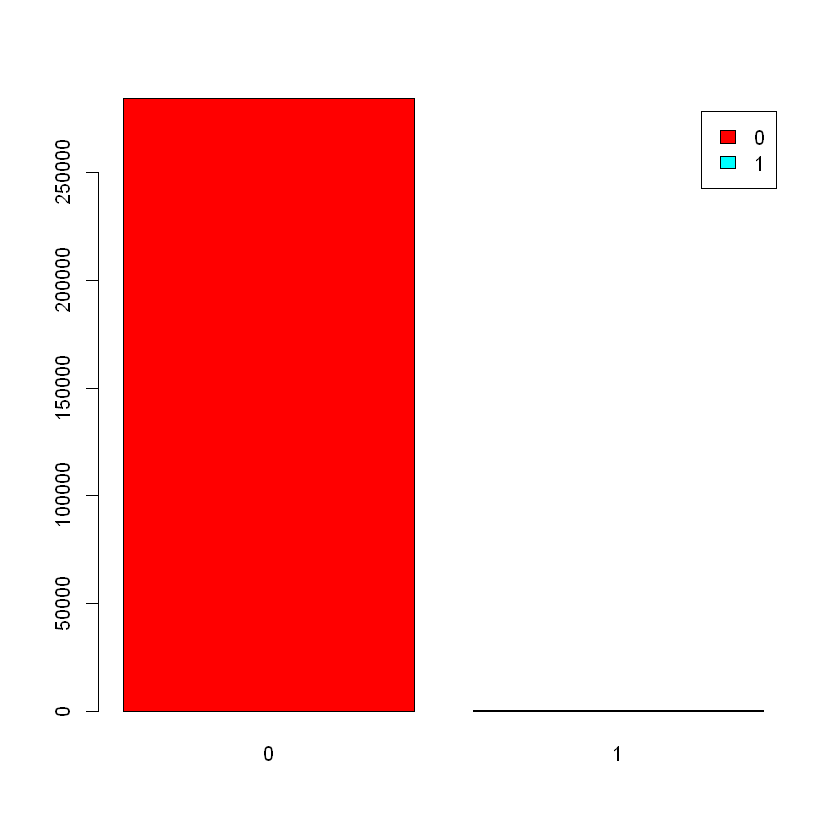

In [3]:
(tbl<-table(df$Class))
barplot(tbl, beside=T,legend=T,col=rainbow(2))

In [4]:
library(ROSE)
df_samp<-ovun.sample(Class ~ . , data=df, seed=1, method='under',
                    N=492*2)$data
(tbl<-table(df_samp$Class))

Warning message:
"package 'ROSE' was built under R version 3.6.2"Loaded ROSE 0.0-3




  0   1 
492 492 

In [5]:
library(ROSE)
df_samp<-ovun.sample(Class ~ . , data=df, seed=1, method='over',
                    N=284315*2)$data
(tbl<-table(df_samp$Class))


     0      1 
284315 284315 

In [6]:
#학습용:검증용 8:2로 구분
library(caret)
set.seed(123)
idx_train<-createDataPartition(y=df_samp$Class,p=0.8,list=F)
train<-df_samp[idx_train,]
X_train<-train[,-30]
y_train<-train[,30]
test<-df_samp[-idx_train,]
X_test<-test[,-30]
y_test<-test[,30]

Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

Warning message:
"package 'reshape' was built under R version 3.6.2"
Attaching package: 'reshape'

The following object is masked from 'package:dplyr':

    rename

Using  as id variables


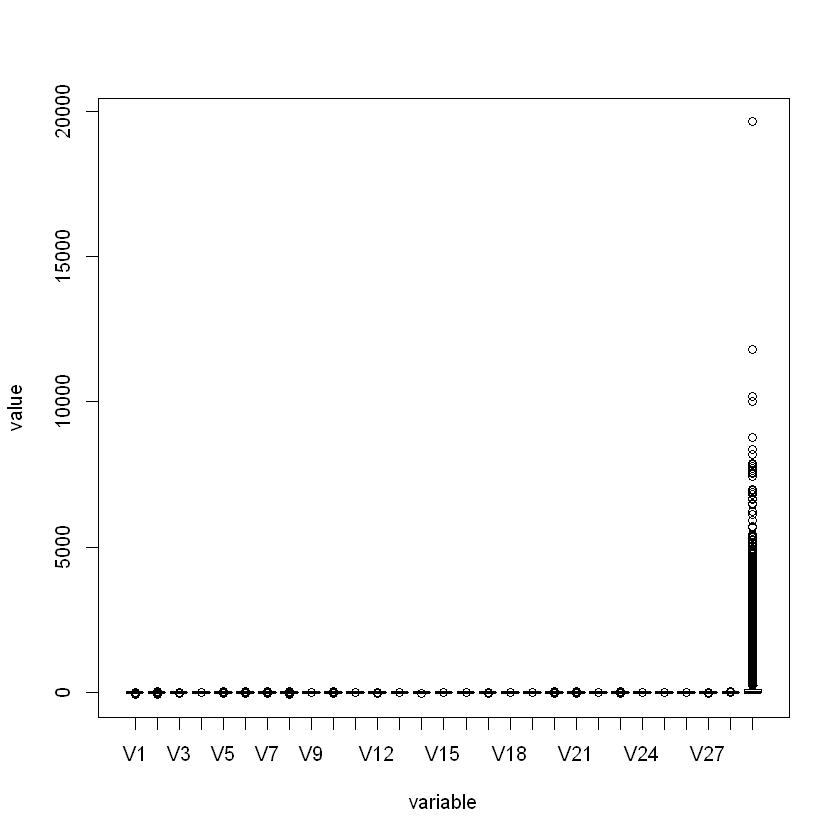

In [7]:
library(reshape)
#scaling 전의 박스플롯
meltData<-melt(X_train)
boxplot(data=meltData,value~variable)

In [8]:
#scale() 변수들의 평균,표준편차들 비슷하게 맞추고 데이터프레임으로 변환
X_train_scaled<-as.data.frame(scale(X_train))
X_test_scaled<-as.data.frame(scale(X_test))
#스케일링된 독립변수들과 종속변수 연결
train_scaled<-cbind(X_train_scaled,Class=y_train)
test_scaled<-cbind(X_test_scaled,Class=y_test)

Using  as id variables


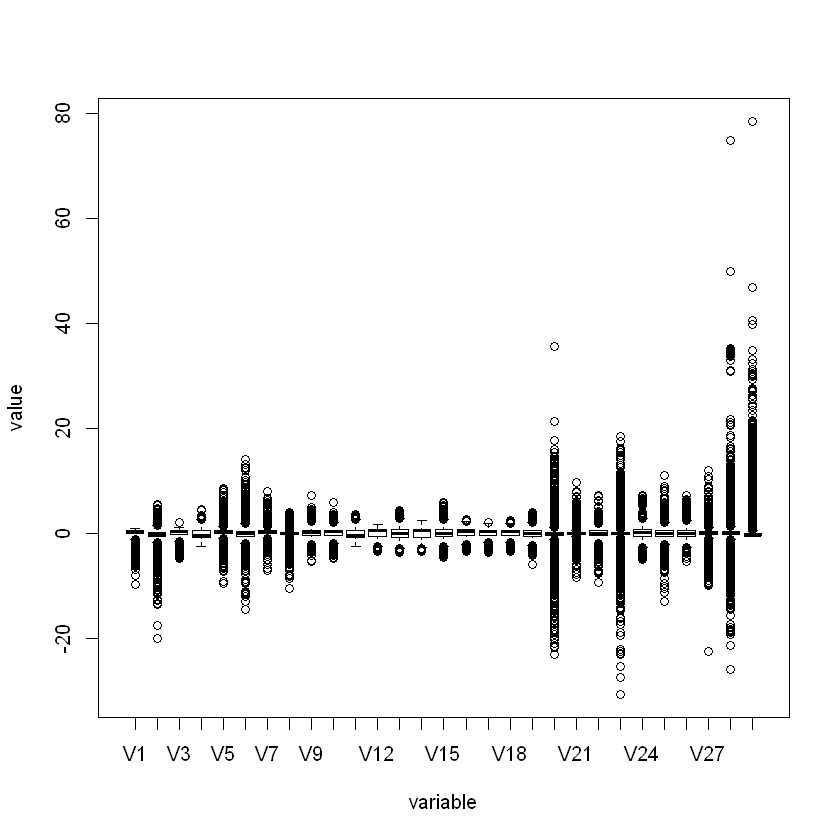

In [9]:
#scaling 후의 박스플롯
meltData<-melt(X_train_scaled)
boxplot(data=meltData,value~variable)

In [10]:
#로지스틱 회귀분석 모형
model<-glm(Class ~ . , data=train_scaled, family=binomial)
summary(model)
#V21, V27변수 유의하지 않음

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = Class ~ ., family = binomial, data = train_scaled)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.2589   0.0000   0.0000   2.9736  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) 14.5047831  0.2401547  60.398  < 2e-16 ***
V1           3.8064929  0.0966999  39.364  < 2e-16 ***
V2           2.4176289  0.0927891  26.055  < 2e-16 ***
V3           2.6502450  0.0812531  32.617  < 2e-16 ***
V4           2.4974189  0.0257162  97.115  < 2e-16 ***
V5           3.1631050  0.0840629  37.628  < 2e-16 ***
V6          -1.0194325  0.0232953 -43.761  < 2e-16 ***
V7          -3.7593810  0.1424948 -26.383  < 2e-16 ***
V8          -1.9770686  0.0402377 -49.135  < 2e-16 ***
V9          -0.7645564  0.0271132 -28.199  < 2e-16 ***
V10         -3.5882229  0.0729267 -49.203  < 2e-16 ***
V11          1.6143087  0.0299524  53.896  < 2e-16 ***
V12         -5.2141084  0.0748794 -69.633  < 2e-16 ***
V13         -0.3898558  0.008

In [11]:
#후진제거법
reduced<-step(model,direction='backward')

Start:  AIC=122599.1
Class ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + V11 + 
    V12 + V13 + V14 + V15 + V16 + V17 + V18 + V19 + V20 + V21 + 
    V22 + V23 + V24 + V25 + V26 + V27 + V28 + Amount



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerica

         Df Deviance    AIC
- V21     1   122531 122589
- V27     1   122539 122597
<none>        122539 122599
- V24     1   122588 122646
- V25     1   122630 122688
- V15     1   122687 122745
- V26     1   122833 122891
- V23     1   123270 123328
- V2      1   123293 123351
- V28     1   123498 123556
- V7      1   123646 123704
- V18     1   123686 123744
- V9      1   123775 123833
- V19     1   123813 123871
- V8      1   124065 124123
- V20     1   124264 124322
- Amount  1   124387 124445
- V3      1   124517 124575
- V5      1   124969 125027
- V6      1   125136 125194
- V13     1   125311 125369
- V17     1   125596 125654
- V22     1   125721 125779
- V16     1   125863 125921
- V1      1   126653 126711
- V11     1   126955 127013
- V10     1   127368 127426
- V4      1   129851 129909
- V12     1   132064 132122
- V14     1   138904 138962


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=122588.9
Class ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + V11 + 
    V12 + V13 + V14 + V15 + V16 + V17 + V18 + V19 + V20 + V22 + 
    V23 + V24 + V25 + V26 + V27 + V28 + Amount



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerica

         Df Deviance    AIC
- V27     1   122531 122587
<none>        122531 122589
- V24     1   122579 122635
- V25     1   122620 122676
- V15     1   122676 122732
- V26     1   122834 122890
- V28     1   123525 123581
- V23     1   123550 123606
- V18     1   123686 123742
- V2      1   123693 123749
- V9      1   123774 123830
- V19     1   123842 123898
- V7      1   124073 124129
- V8      1   124477 124533
- V20     1   124757 124813
- V3      1   124860 124916
- Amount  1   125278 125334
- V13     1   125346 125402
- V5      1   125622 125678
- V17     1   125674 125730
- V22     1   125803 125859
- V6      1   125852 125908
- V16     1   126007 126063
- V1      1   126915 126971
- V11     1   126969 127025
- V10     1   127372 127428
- V12     1   132196 132252
- V4      1   135915 135971
- V14     1   139484 139540


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=122587
Class ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + V11 + 
    V12 + V13 + V14 + V15 + V16 + V17 + V18 + V19 + V20 + V22 + 
    V23 + V24 + V25 + V26 + V28 + Amount



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted 

         Df Deviance    AIC
<none>        122531 122587
- V24     1   122579 122633
- V25     1   122620 122674
- V15     1   122677 122731
- V26     1   122835 122889
- V28     1   123531 123585
- V23     1   123638 123692
- V18     1   123686 123740
- V2      1   123777 123831
- V9      1   123861 123915
- V19     1   123916 123970
- V7      1   124352 124406
- V8      1   124571 124625
- V3      1   124951 125005
- V13     1   125346 125400
- V20     1   125464 125518
- Amount  1   125644 125698
- V17     1   125677 125731
- V5      1   125796 125850
- V22     1   125911 125965
- V6      1   125992 126046
- V16     1   126011 126065
- V11     1   127009 127063
- V1      1   127027 127081
- V10     1   127677 127731
- V12     1   132215 132269
- V4      1   136036 136090
- V14     1   140356 140410


In [12]:
#인공신경망 모형 생성
library(nnet)
model<-nnet(Class ~ ., data=train_scaled, size=10)
summary(model)

# weights:  311
initial  value 158202.782412 
final  value 50478.000000 
converged


a 29-10-1 network with 311 weights
options were -
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
  -0.73  -13.01    8.94  -19.05   30.20  -10.60  -13.74  -11.07    2.26  -19.20 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
 -22.31   26.86  -25.19   -5.86  -31.73    0.02  -20.17  -18.38  -11.73    6.20 
i20->h1 i21->h1 i22->h1 i23->h1 i24->h1 i25->h1 i26->h1 i27->h1 i28->h1 i29->h1 
  17.74    6.67   -0.90   -4.34    0.07   -0.20   -2.04    4.72    8.10   28.45 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
 -13.87   46.82  -63.12   78.96 -136.28   34.99   43.11   60.47   25.42   86.46 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
 107.34 -122.56  107.23   27.30  144.87   29.20   75.85   64.08   33.05  -12.37 
i20->h2 i21->h2 i22->h2 i23->h2 i24->h2 i25->h2 i26->h2 i27->h2 i28->h2 i29->h2 
 -46.31    4.54  -36.97    0.84  -43.07   -9.97   31.04    

Warning message:
"package 'devtools' was built under R version 3.6.2"Loading required package: usethis
Warning message:
"package 'usethis' was built under R version 3.6.2"SHA-1 hash of file is bf3c7b8ac910823b729e3ce73bb6ab5e6955ad3d
Loading required package: scales
Warning message:
"package 'scales' was built under R version 3.6.2"

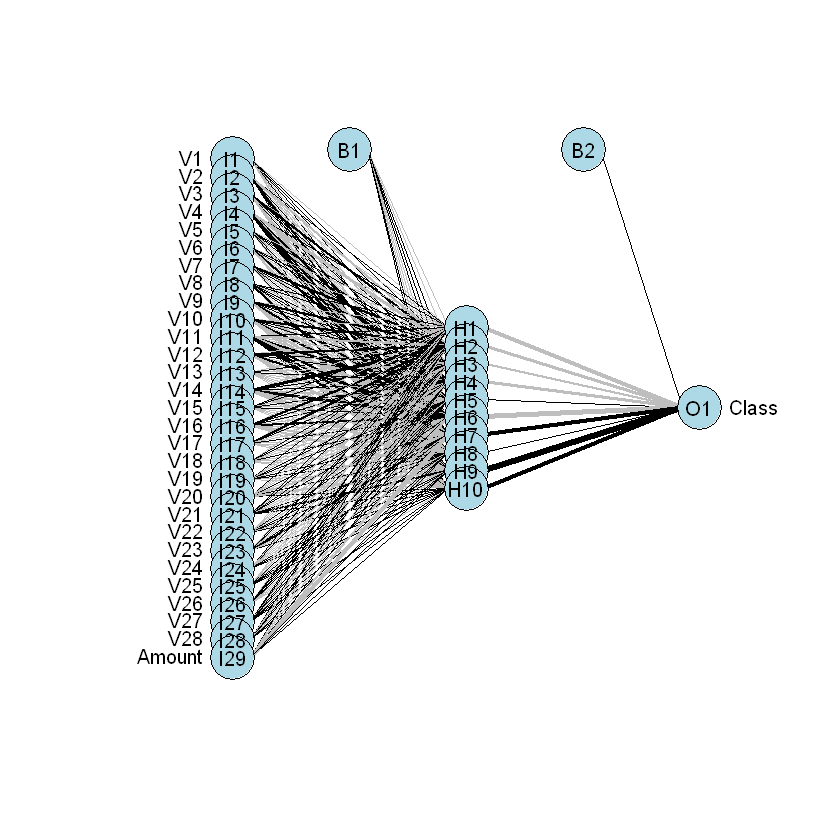

In [13]:
#인공신경망 그래프
library(devtools)

source_url('https://gist.githubusercontent.com/Peque/41a9e20d6687f2f3108d/raw/85e14f3a292e126f1454864427e3a189c2fe33f3/nnet_plot_update.r')

plot.nnet(model)

Warning message:
"package 'NeuralNetTools' was built under R version 3.6.2"

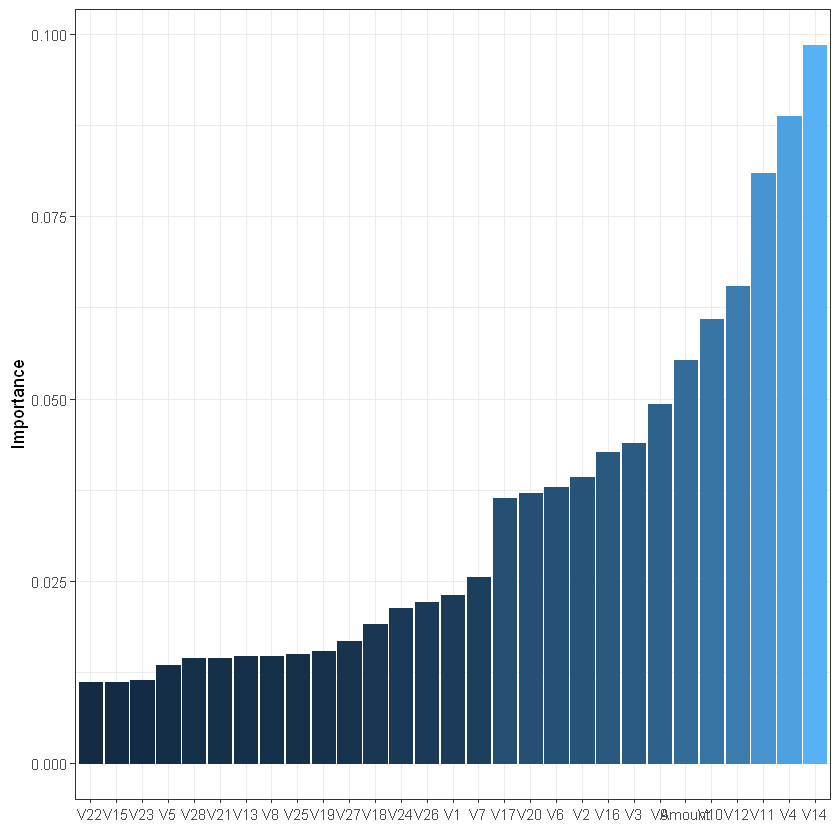

In [14]:
library(NeuralNetTools)
garson(model)#변수 중요도 그래프

In [15]:
#학습용 데이터셋의 예측 정확도
pred<-predict(model,X_train_scaled)
result<-round(pred)
table(y_train,result)
mean(y_train == result)

       result
y_train      0      1
      0 227333    119
      1  50359 177093

[1] 0.8890359

In [16]:
#검증용 데이터셋의 예측 정확도
pred<-predict(model,X_test_scaled)
result<-round(pred)
table(y_test,result)
mean(y_test == result)

      result
y_test     0     1
     0 56830    33
     1 12623 44240

[1] 0.888715